<a href="https://colab.research.google.com/github/GiorgoR/novamex-sales-quiz/blob/Giovanni_Reyes/Novamex_Challenge_Giovanni_Reyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries


In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_sales = pd.read_csv('/content/drive/MyDrive/Novamex/sales.csv')
df_sales.head()

,Unnamed: 0,StoreID,Month,Sales
0,0,1,1,690
1,1,1,2,929
2,2,1,3,418
3,3,1,4,624
4,4,1,5,588


In [ ]:
df_sales = df_sales.drop(columns = ['Unnamed: 0'])

In [ ]:
df_promotions = pd.read_csv('/content/drive/MyDrive/Novamex/promotion.csv')
df_promotions.head()

In [ ]:
df_promotions = df_promotions.drop(columns = ['Unnamed: 0'])

In [ ]:
#Notas importantes

#Ambos sin valores nulos
# df_sales.isna().sum()
# df_promotions.isna().sum()

##Sales

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   StoreID  1200 non-null   int64
 1   Month    1200 non-null   int64
 2   Sales    1200 non-null   int64
dtypes: int64(3)
memory usage: 28.2 KB


In [ ]:
df_sales.describe()

,StoreID,Month,Sales
count,1200.000000,1200.000000,1200.000000
mean,50.500000,6.500000,771.350833
std,28.878105,3.453492,726.207615
min,1.000000,1.000000,401.000000
25%,25.750000,3.750000,551.000000
50%,50.500000,6.500000,710.000000
75%,75.250000,9.250000,880.000000
max,100.000000,12.000000,17604.000000


In [ ]:
df_sales['StoreID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
storeid_sales = pd.DataFrame(df_sales.groupby('StoreID')['Sales'].sum().sort_values(ascending = False))
storeid_sales

,Sales
StoreID,
25,25933
31,19076
32,17125
28,16444
23,14661
...,...
4,7444
55,7399
17,7370


In [ ]:
TOP_5_storeid_sales = storeid_sales.head()

<Figure size 800x600 with 0 Axes>

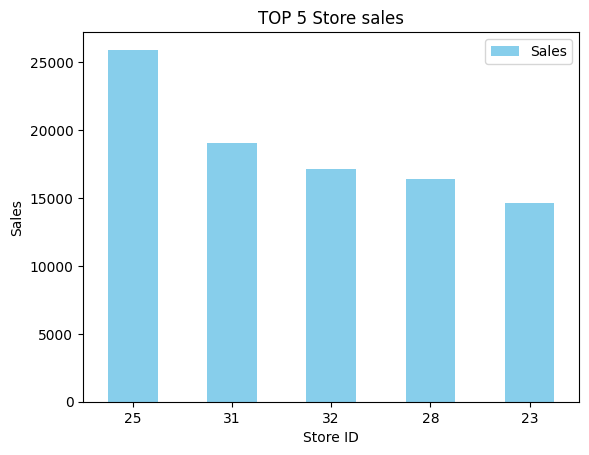

In [ ]:
plt.figure(figsize=(8, 6))
TOP_5_storeid_sales.plot(kind='bar', color='skyblue')
plt.title('TOP 5 Store sales')
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [ ]:
WORST_5_storeid_sales = storeid_sales.tail()

<Figure size 800x600 with 0 Axes>

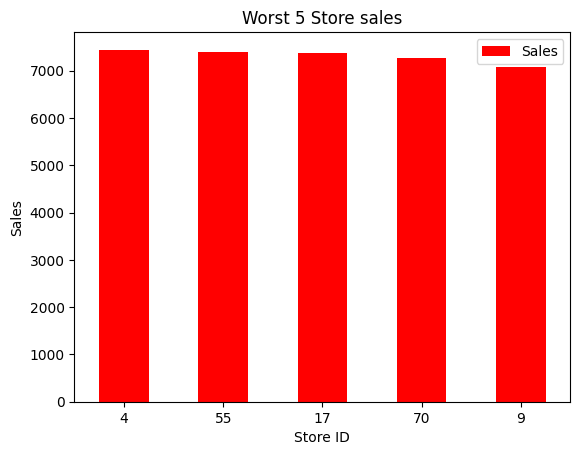

In [ ]:
plt.figure(figsize=(8, 6))
WORST_5_storeid_sales.plot(kind='bar', color='red')
plt.title('Worst 5 Store sales')
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

In [ ]:
monthly_sales = pd.DataFrame(df_sales.groupby('Month')['Sales'].sum())
monthly_sales

,Sales
Month,
1,72140
2,68522
3,88791
4,69614
5,71199
6,70744
7,70970
8,72553
9,114247


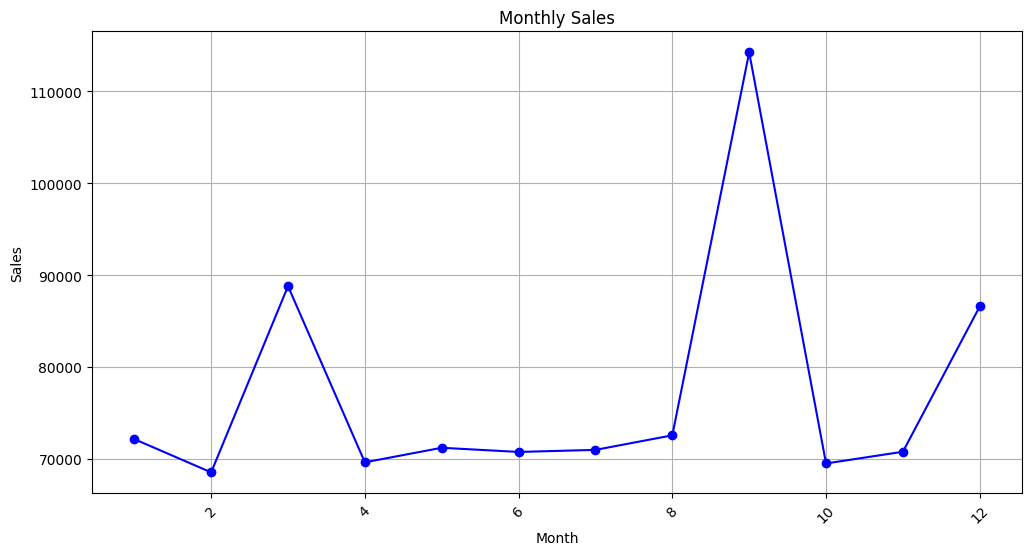

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##Promotions


In [ ]:
df_promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   StoreID         30 non-null     int64 
 1   PromotionSpent  30 non-null     int64 
 2   PromotionMonth  30 non-null     int64 
 3   PromotionType   30 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [ ]:
# Function to convert month number to month name
def month_number_to_string(month_number):
    if 1 <= month_number <= 12:
        return calendar.month_name[month_number]
    else:
        return "Invalid Month"

In [ ]:
df_promotions['month_names'] = df_promotions['PromotionMonth'].apply(month_number_to_string)
df_promotions.head()

,StoreID,PromotionSpent,PromotionMonth,PromotionType,month_names
0,20,100,12,PromotionB,December
1,20,117,9,PromotionA,September
2,21,244,3,PromotionA,March
3,21,102,9,PromotionB,September
4,22,167,9,PromotionA,September


In [ ]:
df_promotions.describe()

,StoreID,PromotionSpent,PromotionMonth
count,30.000000,30.000000,30.000000
mean,27.000000,223.800000,8.400000
std,4.394354,84.750099,3.286335
min,20.000000,100.000000,3.000000
25%,23.250000,174.750000,9.000000
50%,27.000000,225.000000,9.000000
75%,30.750000,272.250000,11.250000
max,34.000000,395.000000,12.000000


In [ ]:
df_promotions['StoreID'].nunique()

15

In [ ]:
df_promotions['PromotionType'].unique()

array(['PromotionB', 'PromotionA'], dtype=object)

In [ ]:
df_promotions['PromotionMonth'].unique()

array([12,  9,  3])

In [ ]:
df_promotions['month_names'].unique()

array(['December', 'September', 'March'], dtype=object)

In [ ]:
## The promotion were executed on March, September and December

In [ ]:
df_promotions['PromotionSpent'].unique()

array([100, 117, 244, 102, 167, 362, 350, 255, 270, 202, 264, 332, 215,
       269, 395, 200, 211, 291, 273, 110, 274, 198, 235, 317, 246])

In [ ]:
promotion_count = pd.DataFrame(df_promotions['month_names'].value_counts().sort_values(ascending=False))
promotion_count

,month_names
September,15
December,8
March,7


In [ ]:
promotion_count = df_promotions['month_names'].value_counts().reset_index()
promotion_count.columns = ['Month', 'Count']
promotion_count

,Month,Count
0,September,15
1,December,8
2,March,7


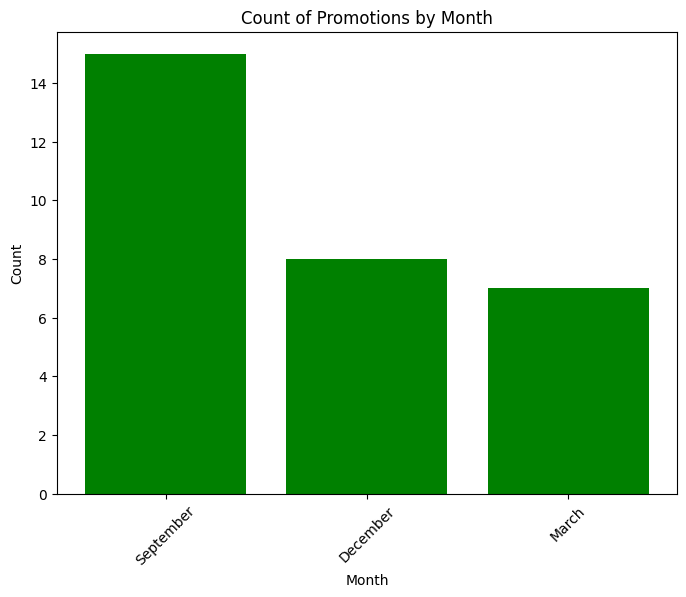

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(promotion_count['Month'], promotion_count['Count'], color='green')
plt.title('Count of Promotions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##ROI

In [ ]:
merged_df = df_sales.merge(df_promotions, on='StoreID', how='inner')
merged_df

,StoreID,Month,Sales,PromotionSpent,PromotionMonth,PromotionType,month_names
0,20,1,624,100,12,PromotionB,December
1,20,1,624,117,9,PromotionA,September
2,20,2,867,100,12,PromotionB,December
3,20,2,867,117,9,PromotionA,September
4,20,3,955,100,12,PromotionB,December
...,...,...,...,...,...,...,...
355,34,10,563,246,3,PromotionA,March
356,34,11,440,317,9,PromotionA,September
357,34,11,440,246,3,PromotionA,March
358,34,12,739,317,9,PromotionA,September


In [ ]:
merged_df['ROI'] = ((merged_df['Sales'] - merged_df['PromotionSpent']) / merged_df['PromotionSpent']) * 100
merged_df

,StoreID,Month,Sales,PromotionSpent,PromotionMonth,PromotionType,month_names,ROI
17,20,9,1888,117,9,PromotionA,September,1513.675214
22,20,12,3018,100,12,PromotionB,December,2918.000000
28,21,3,1744,244,3,PromotionA,March,614.754098
41,21,9,3665,102,9,PromotionB,September,3493.137255
64,22,9,2898,167,9,PromotionA,September,1635.329341
65,22,9,2898,362,9,PromotionA,September,700.552486
88,23,9,3584,100,9,PromotionB,September,3484.000000
95,23,12,3485,350,12,PromotionB,December,895.714286
100,24,3,2775,255,3,PromotionA,March,988.235294
119,24,12,2316,270,12,PromotionA,December,757.777778


In [ ]:
merged_df = merged_df[merged_df['Month'] == merged_df['PromotionMonth']]
merged_df#.reset_index()

,StoreID,Month,Sales,PromotionSpent,PromotionMonth,PromotionType,month_names,ROI
17,20,9,1888,117,9,PromotionA,September,1513.675214
22,20,12,3018,100,12,PromotionB,December,2918.000000
28,21,3,1744,244,3,PromotionA,March,614.754098
41,21,9,3665,102,9,PromotionB,September,3493.137255
64,22,9,2898,167,9,PromotionA,September,1635.329341
65,22,9,2898,362,9,PromotionA,September,700.552486
88,23,9,3584,100,9,PromotionB,September,3484.000000
95,23,12,3485,350,12,PromotionB,December,895.714286
100,24,3,2775,255,3,PromotionA,March,988.235294
119,24,12,2316,270,12,PromotionA,December,757.777778


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 17 to 352
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StoreID         30 non-null     int64  
 1   Month           30 non-null     int64  
 2   Sales           30 non-null     int64  
 3   PromotionSpent  30 non-null     int64  
 4   PromotionMonth  30 non-null     int64  
 5   PromotionType   30 non-null     object 
 6   month_names     30 non-null     object 
 7   ROI             30 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.1+ KB


In [ ]:
merged_df.columns

Index(['StoreID', 'Month', 'Sales', 'PromotionSpent', 'PromotionMonth',
       'PromotionType', 'month_names', 'ROI'],
      dtype='object')

In [ ]:
max_roi_per_promotion = merged_df.groupby('PromotionType')['ROI'].max()
max_roi_per_promotion

PromotionType
PromotionA     8614.851485
PromotionB    11076.363636
Name: ROI, dtype: float64

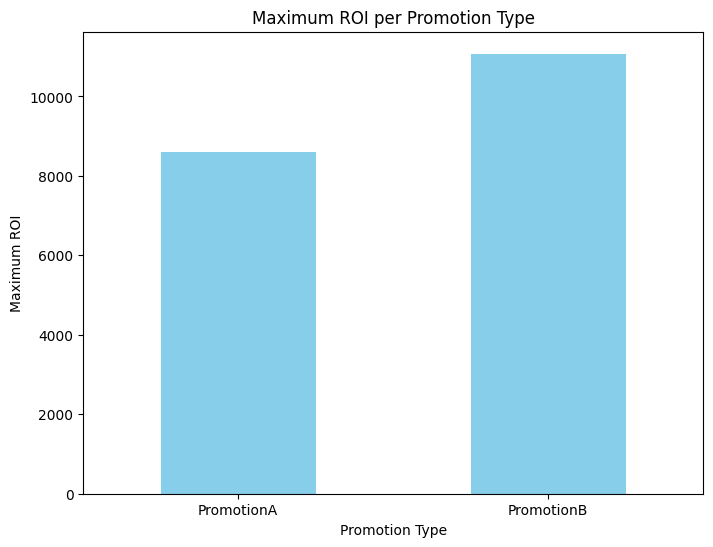

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))
max_roi_per_promotion.plot(kind='bar', color='skyblue')
plt.title('Maximum ROI per Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Maximum ROI')
plt.xticks(rotation=0)
plt.show()

<ipython-input-238-33a131724ac0>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = merged_df, x="month_names", y="ROI", hue = 'PromotionType', ci = None)


<Axes: title={'center': 'Total ROI value per Month'}, xlabel='month_names', ylabel='ROI'>

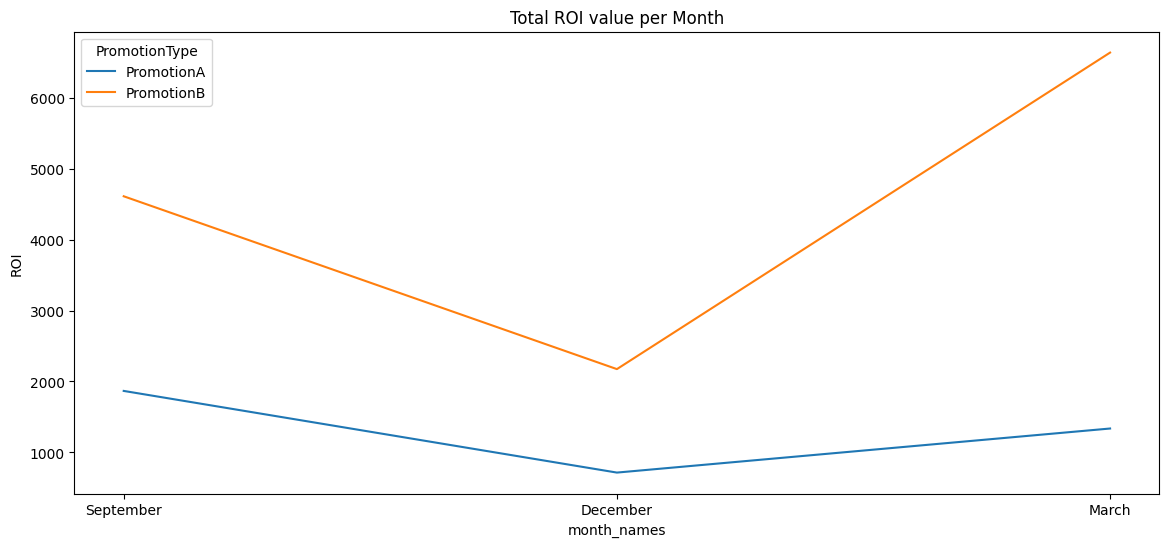

In [ ]:
plt.figure(figsize=(14,6))

# Add title
plt.title("Total ROI value per Month")

# # Line chart showing daily global streams of each song
sns.lineplot(data = merged_df, x="month_names", y="ROI", hue = 'PromotionType', ci = None)

# Check your answer


<ipython-input-239-f59b8e8e350b>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = merged_df, x="StoreID", y="ROI", hue = 'PromotionType', ci = None)


<Axes: title={'center': 'Total ROI value per Store'}, xlabel='StoreID', ylabel='ROI'>

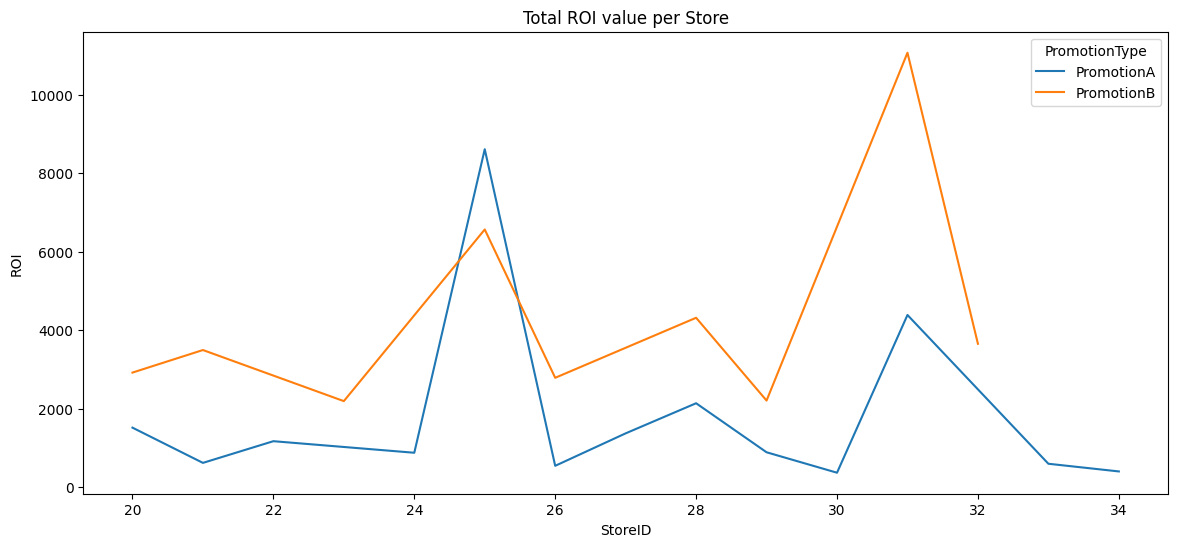

In [ ]:
plt.figure(figsize=(14,6))

# Add title
plt.title("Total ROI value per Store")

# # Line chart showing daily global streams of each song
sns.lineplot(data = merged_df, x="StoreID", y="ROI", hue = 'PromotionType', ci = None)